In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pickle

In [16]:
net_data = pd.read_csv("Fertilizer-Prediction (3).csv")
net_data.head(10)


,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
5,26,52,35,Sandy,Barley,12,10,13,17-17-17
6,25,50,64,Red,Cotton,9,0,10,20-20
7,33,64,50,Loamy,Wheat,41,0,0,Urea
8,30,60,42,Sandy,Millets,21,0,18,28-28
9,29,58,33,Black,Oil seeds,9,7,30,14-35-14


In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
net_data['Soil Type'] =le.fit_transform(net_data['Soil Type'])

#net_data.head(10)


In [18]:
#from sklearn.preprocessing import OneHotEncoder
#net_data  = net_data.reshape(-1, 1)
#net_data['Soil Type'] = OneHotEncoder().fit_transform(net_data['Soil Type'])
net_data.head(10)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,Maize,37,0,0,Urea
1,29,52,45,2,Sugarcane,12,0,36,DAP
2,34,65,62,0,Cotton,7,9,30,14-35-14
3,32,62,34,3,Tobacco,22,0,20,28-28
4,28,54,46,1,Paddy,35,0,0,Urea
5,26,52,35,4,Barley,12,10,13,17-17-17
6,25,50,64,3,Cotton,9,0,10,20-20
7,33,64,50,2,Wheat,41,0,0,Urea
8,30,60,42,4,Millets,21,0,18,28-28
9,29,58,33,0,Oil seeds,9,7,30,14-35-14


In [26]:
features = ['Temparature','Humidity','Moisture','Nitrogen','Potassium', 'Phosphorous','Soil Type']
pre =['Crop Type']
X = net_data[features]
Y = net_data['Crop Type']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=3)

In [27]:
from sklearn.ensemble import RandomForestClassifier

clf_soil =  RandomForestClassifier(n_estimators=50)
clf_soil =  clf_soil.fit(X_train , y_train)
y_pred = clf_soil.predict(X_test)

C:\Users\Bhupin Baral\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bhupin Baral\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Barley       0.00      0.00      0.00         0
      Cotton       1.00      1.00      1.00         3
 Ground Nuts       0.00      0.00      0.00         1
       Maize       0.00      0.00      0.00         2
     Millets       1.00      0.67      0.80         3
   Oil seeds       0.50      1.00      0.67         1
       Paddy       1.00      1.00      1.00         3
      Pulses       0.67      0.67      0.67         3
   Sugarcane       1.00      1.00      1.00         3
     Tobacco       1.00      0.67      0.80         3
       Wheat       0.67      0.67      0.67         3

    accuracy                           0.72        25
   macro avg       0.62      0.61      0.60        25
weighted avg       0.78      0.72      0.74        25

[[0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [2 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 

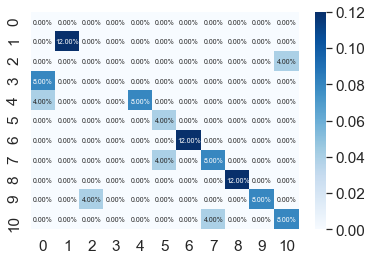

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)
sns.set(font_scale=1.4) # for label size
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues', annot_kws={"size": 7})


In [29]:
from sklearn import metrics
accu = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",accu*100, "%")

Accuracy: 72.0 %


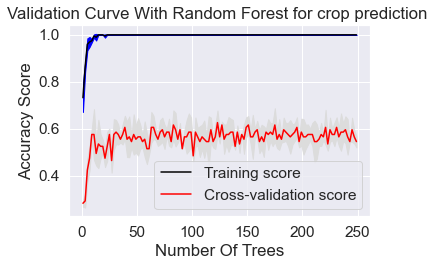

In [30]:
from sklearn.model_selection import validation_curve
# Create range of values for parameter
param_range = np.arange(1, 250, 2)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(clf_soil, 
                                             X, 
                                             Y, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="red")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="blue")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest for crop prediction ")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [32]:
filename= 'Crop_pred_model'
pickle.dump(clf_soil,open(filename,'wb'))


In [33]:
loaded_model = pickle.load(open(filename,'rb'))
